In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
from collections import Counter
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [89]:
def visualize_kmeans(vectors, reducer = PCA, k = 8, drop_outliers = False):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(vectors)

    silhouette_avg = silhouette_score(vectors, kmeans_labels)
    c = Counter(kmeans_labels)
    
    reducer_ = reducer(n_components=2, random_state=42)
    vec_reduced = reducer_.fit_transform(vectors)

    if drop_outliers:
        # drop 5% points farthest away from the center of the reduced space
        reducer_center = np.mean(vec_reduced, axis = 0)
        dist_center = [(i, np.linalg.norm(vec_reduced[i, :] - reducer_center)) for i in range(vec_reduced.shape[0])]
        dist_center.sort(key = lambda x: x[1])
        keep_idxs = [x[0] for x in dist_center[:-int(len(dist_center) * 0.05)]]
        vec_reduced = vec_reduced[keep_idxs, :]
        kmeans_labels = kmeans_labels[keep_idxs]


    plt.figure(figsize=(12, 8))
    colors = ['blue', 'green', 'red', 'black', 'yellow', 'purple', 'pink', 'brown']

    if k <= 8:
        scatter = plt.scatter(vec_reduced[:, 0], vec_reduced[:, 1], cmap=ListedColormap(colors[:k]), c=kmeans_labels, s=10)
        plt.colorbar(scatter, ticks=list(range(k)), label='Cluster')
    else:
        scatter = plt.scatter(vec_reduced[:, 0], vec_reduced[:, 1], c=kmeans_labels, s=10)
    
    plt.title('K-means Clusters')
    plt.show()

    print(f'K={k}, Average Silhouette score: {silhouette_avg}\n')
    print(f'Cluster distribution:\n {sorted(c.items())}')
    
    return kmeans_labels

In [59]:
vector_dict = {}
for i in range(0, 1000, 100):
    partial_vector_dict = pd.read_pickle(f"importances/importances/importance_{i+99}.pkl")
    vector_dict.update(partial_vector_dict)

vector_dict_l1 = {k:v[0].numpy() for k,v in vector_dict.items()}
vectors = np.array(list(vector_dict_l1.values()))

### Run with different K values

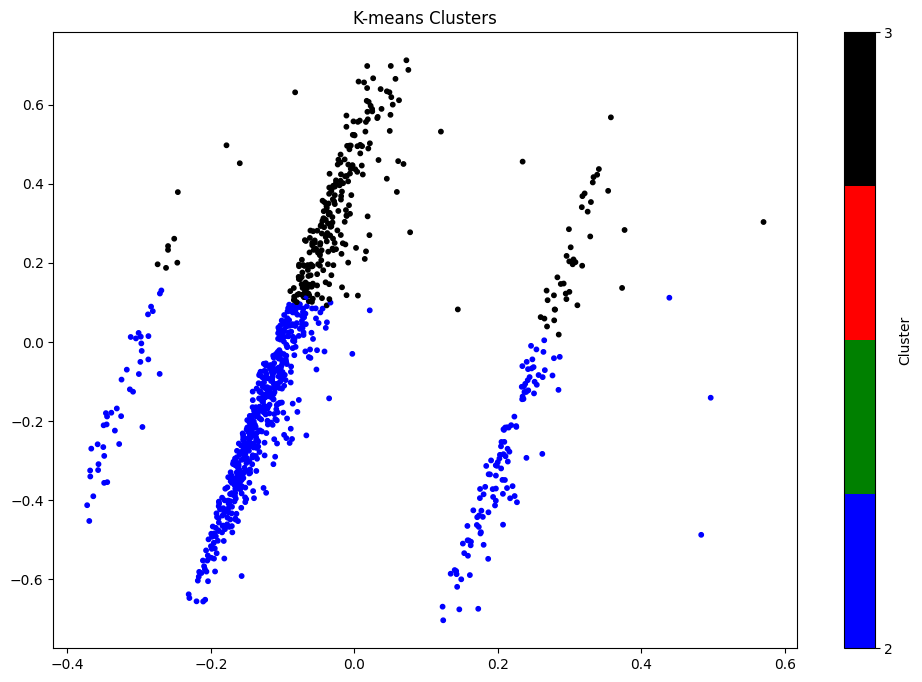

K=4, Average Silhouette score: 0.2430669150664397

Cluster distribution:
 [(0, 2), (1, 1), (2, 676), (3, 321)]


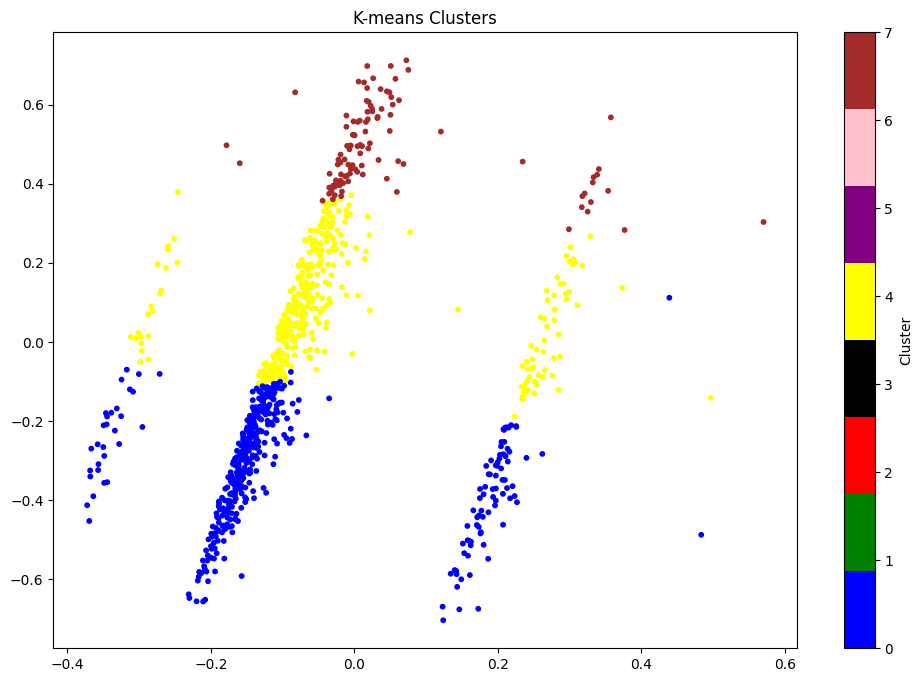

K=8, Average Silhouette score: 0.12894625317465147

Cluster distribution:
 [(0, 456), (1, 1), (2, 1), (3, 1), (4, 393), (5, 5), (6, 1), (7, 142)]


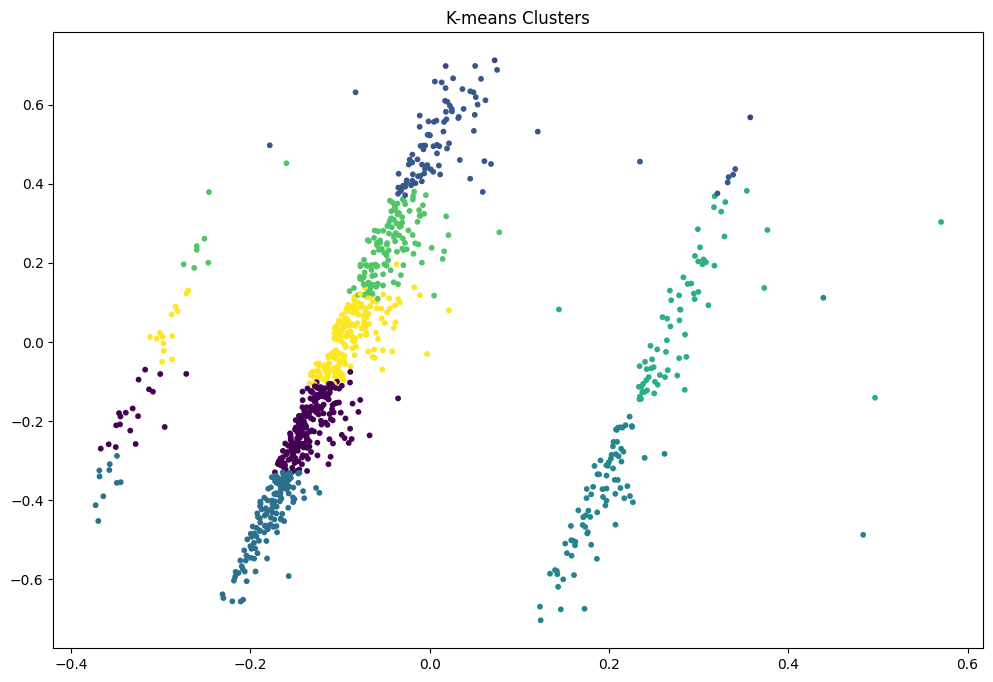

K=16, Average Silhouette score: 0.03271368568577868

Cluster distribution:
 [(0, 5), (1, 1), (2, 1), (3, 232), (4, 1), (5, 26), (6, 91), (7, 141), (8, 83), (9, 11), (10, 67), (11, 137), (12, 1), (13, 1), (14, 201), (15, 1)]


In [92]:
# drop outliers
for k in [4, 8, 16]:
    visualize_kmeans(vectors, k=k, drop_outliers=True)

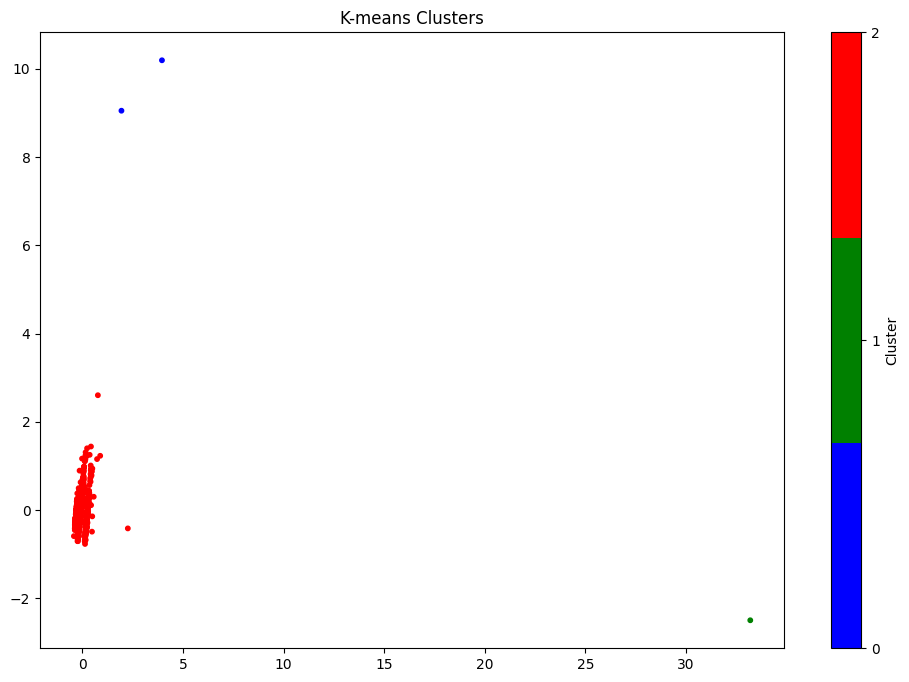

K=3, Average Silhouette score: 0.9203584877074263

Cluster distribution:
 [(0, 2), (1, 1), (2, 997)]


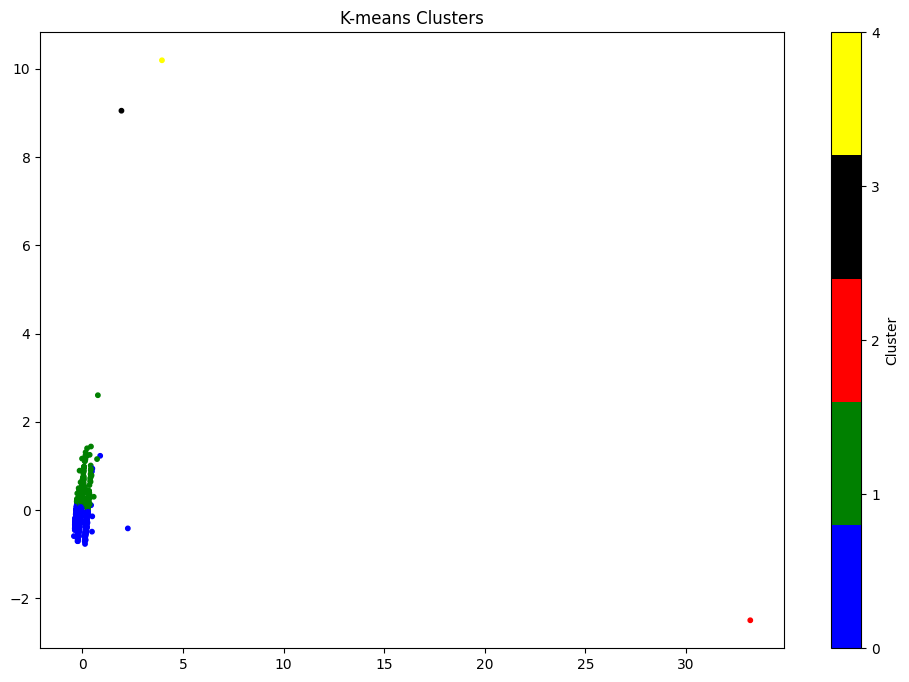

K=5, Average Silhouette score: 0.24322160233988177

Cluster distribution:
 [(0, 676), (1, 321), (2, 1), (3, 1), (4, 1)]


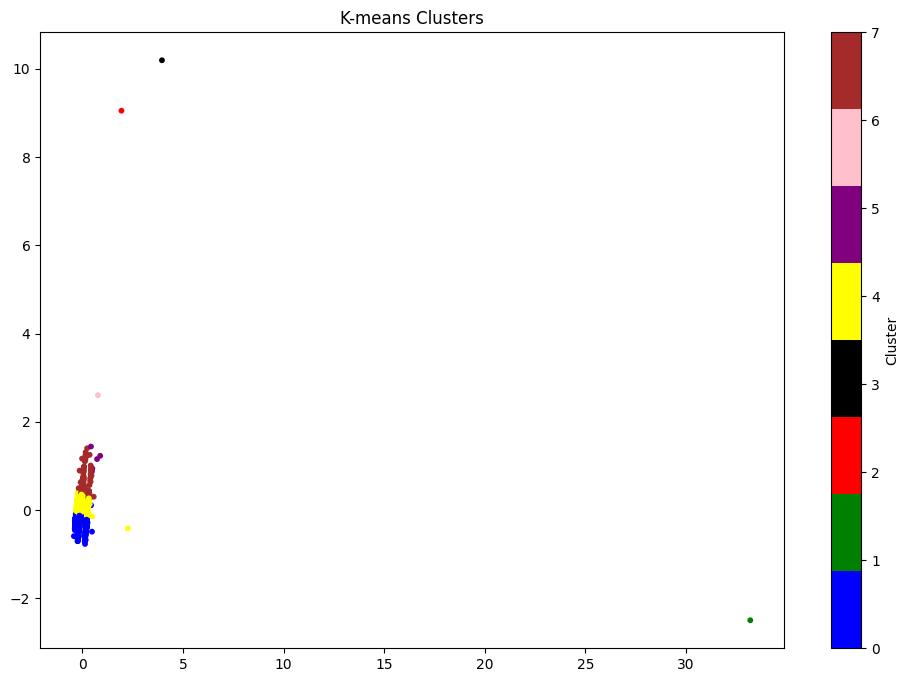

K=8, Average Silhouette score: 0.12894625317465147

Cluster distribution:
 [(0, 456), (1, 1), (2, 1), (3, 1), (4, 393), (5, 5), (6, 1), (7, 142)]


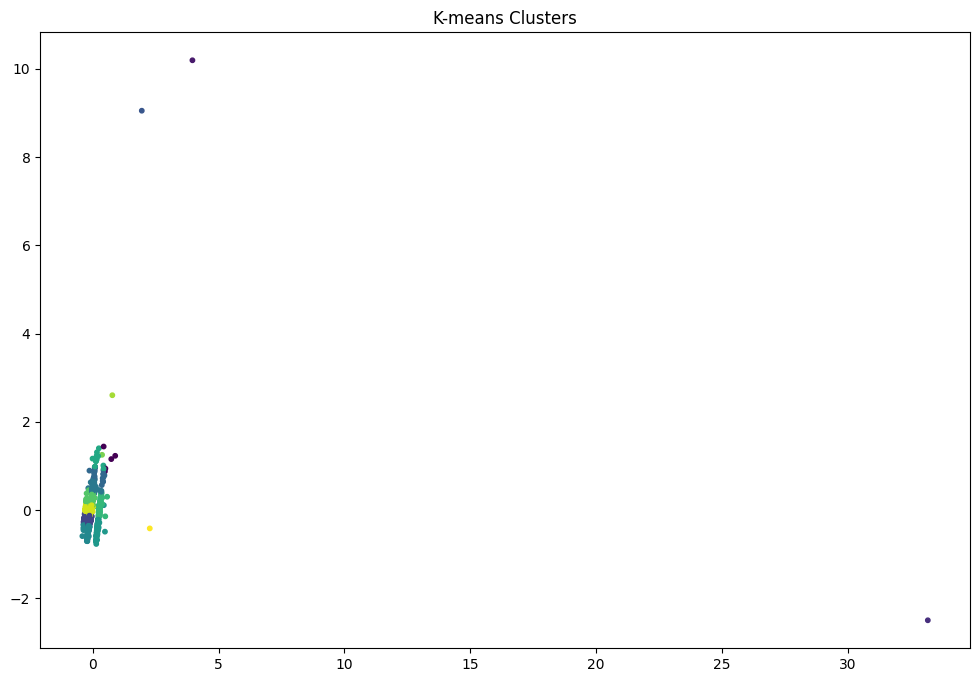

K=16, Average Silhouette score: 0.03271368568577868

Cluster distribution:
 [(0, 5), (1, 1), (2, 1), (3, 232), (4, 1), (5, 26), (6, 91), (7, 141), (8, 83), (9, 11), (10, 67), (11, 137), (12, 1), (13, 1), (14, 201), (15, 1)]


In [74]:
for k in [3,5,8, 16]:
    visualize_kmeans(vectors, k=k)

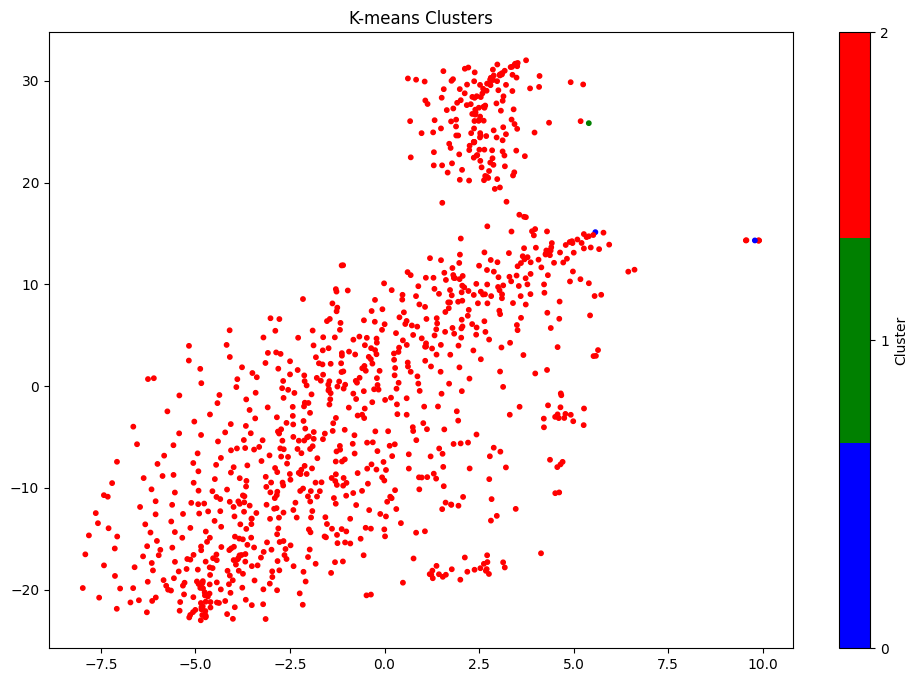

K=3, Average Silhouette score: 0.9203584877074263

Cluster distribution:
 [(0, 2), (1, 1), (2, 997)]


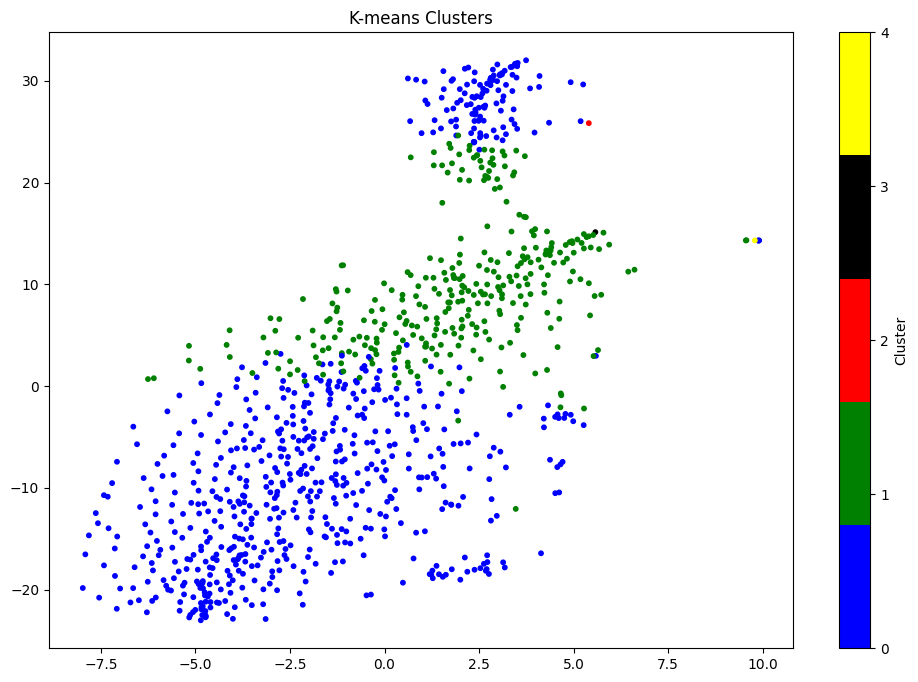

K=5, Average Silhouette score: 0.24322160233988177

Cluster distribution:
 [(0, 676), (1, 321), (2, 1), (3, 1), (4, 1)]


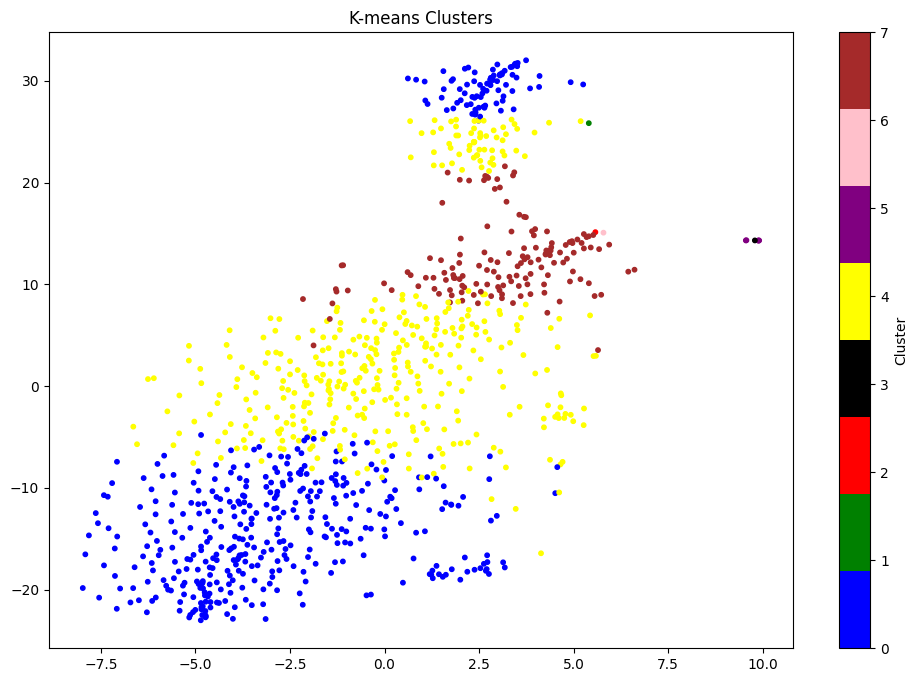

K=8, Average Silhouette score: 0.12894625317465147

Cluster distribution:
 [(0, 456), (1, 1), (2, 1), (3, 1), (4, 393), (5, 5), (6, 1), (7, 142)]


In [66]:
for k in [3,5,8]:
    visualize_kmeans(vectors, reducer=TSNE, k=k)